<a href="https://colab.research.google.com/github/WooyoungJeong/wjeong/blob/main/Black_Friday_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import seaborn as sns
import io

#1 Data Import

In [4]:
from google.colab import files
uploaded = files.upload()

Saving black_friday.csv to black_friday (1).csv


In [9]:
df = pd.read_csv(io.BytesIO(uploaded['black_friday.csv']))

In [10]:
## rename columns to make easier to code
df = df.rename(columns = {'User_ID' : 'userid', 'Product_ID' : 'productid', 'Gender' : 'gender', 'Age' : 'age',
                          'Occupation' : 'occupation', 'City_Category' : 'citycategory', 'Stay_In_Current_City_Years' : 'stayedyears',
                          'Marital_Status' : 'maritalstatus', 'Product_Category_1' : 'productcategory1', 'Product_Category_2' : 'productcategory2',
                          'Product_Category_3' : 'productcategory3', 'Purchase' : 'purchase'})
df.head()

,userid,productid,gender,age,occupation,citycategory,stayedyears,maritalstatus,productcategory1,productcategory2,productcategory3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
# check number of rows and columns of dataset
df.shape

(550068, 12)

In [12]:
# check range of numbers in category
df.productcategory1.value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: productcategory1, dtype: int64

#### Null Values in dataset

There were null values in only category 2 and 3.
This refers that items that have null values have just 1 or 2 categories for those items.
Null values will be filled with 0 which is not a number for product category.

In [15]:
# Check number of null values per column
df.isnull().sum()

userid                   0
productid                0
gender                   0
age                      0
occupation               0
citycategory             0
stayedyears              0
maritalstatus            0
productcategory1         0
productcategory2    173638
productcategory3    383247
purchase                 0
dtype: int64

In [17]:
# fill na value with 0 in product category
df = df.fillna(0)

In [18]:
# check duplicates
df.duplicated().sum()

0

#### Data cleaning for column

Cleaned each column to double check data type or any values that can be disturbed while doing data analysis

In [19]:
# Clean and check column variables
# userid

df.userid.unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [20]:
# productid

df.productid.unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [21]:
#gender

df.gender.unique()

array(['F', 'M'], dtype=object)

In [22]:
# age
df.age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [23]:
# occupation
df.occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [24]:
# city
df.citycategory.unique()

array(['A', 'C', 'B'], dtype=object)

In [25]:
# stayed years
df.stayedyears.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [26]:
# change stayedyears to int type

def remove_plus(x):
    if '+' in x:
        x = x.replace('+', '')
        return x
    else: return x
df['stayedyears'] = df.stayedyears.map(remove_plus).astype('int64')



In [27]:
# check stayedyears
df.stayedyears.unique()

array([2, 4, 3, 1, 0])

In [28]:
# maritalstatus

df.maritalstatus.unique()

array([0, 1])

In [29]:
# check productcategory1

df.productcategory1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [30]:
# check productcategory2

df.productcategory2.unique()

array([ 0.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [31]:
# change productcategory2 type to int
df['productcategory2'] = df.productcategory2.astype('int64')

In [32]:
# check productcategory3
df.productcategory3.unique()


array([ 0., 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [33]:
# change productcategory2 type to int
df['productcategory3'] = df.productcategory3.astype('int64')

In [34]:
# check purchase
df.purchase.unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613])

In [35]:
# final columns check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   userid            550068 non-null  int64 
 1   productid         550068 non-null  object
 2   gender            550068 non-null  object
 3   age               550068 non-null  object
 4   occupation        550068 non-null  int64 
 5   citycategory      550068 non-null  object
 6   stayedyears       550068 non-null  int64 
 7   maritalstatus     550068 non-null  int64 
 8   productcategory1  550068 non-null  int64 
 9   productcategory2  550068 non-null  int64 
 10  productcategory3  550068 non-null  int64 
 11  purchase          550068 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 50.4+ MB


In [36]:
df.head()

,userid,productid,gender,age,occupation,citycategory,stayedyears,maritalstatus,productcategory1,productcategory2,productcategory3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,0,0,7969


# 2. Analysis Data

#### Purchase vs other columns

Because the purchase amount is the most siginificant factor of the sale,
comparing with other columns to figure out any particular characteristics of each columns that can be important.

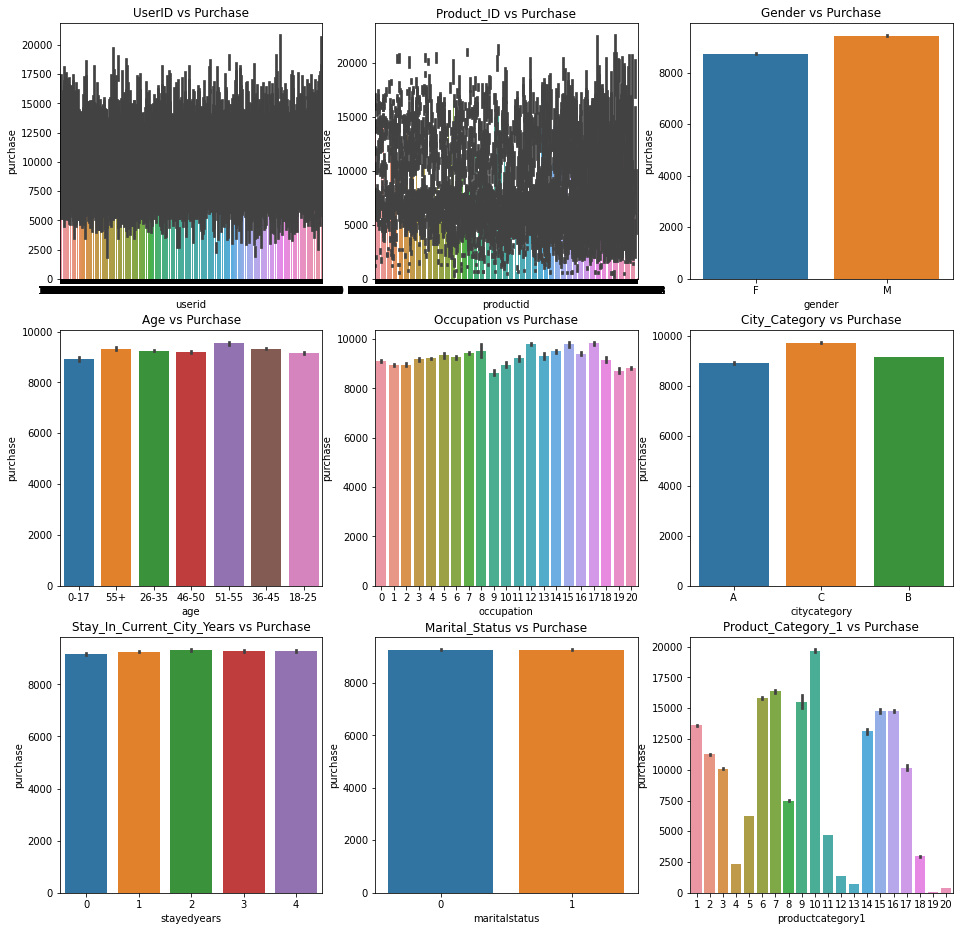

In [37]:
# all columns vs purchase
plt.figure(figsize = (16,16))

## userid vs purchase
plt.subplot(3, 3, 1)
plt.title('UserID vs Purchase')
sns.barplot(x = 'userid', y='purchase', data = df)

## productid vs purchase
plt.subplot(3, 3, 2)
plt.title('Product_ID vs Purchase')
sns.barplot(x = 'productid', y='purchase', data = df)

## gender vs purchase
plt.subplot(3, 3, 3)
plt.title('Gender vs Purchase')
sns.barplot(x = 'gender', y='purchase', data = df)

## age vs purchase
plt.subplot(3, 3, 4)
plt.title('Age vs Purchase')
sns.barplot(x = 'age', y='purchase', data = df)

## occupation vs purchase
plt.subplot(3, 3, 5)
plt.title('Occupation vs Purchase')
sns.barplot(x = 'occupation', y='purchase', data = df)

## citycategory vs purchase
plt.subplot(3, 3, 6)
plt.title('City_Category vs Purchase')
sns.barplot(x = 'citycategory', y='purchase', data = df)

## stayedyears vs purchase
plt.subplot(3, 3, 7)
plt.title('Stay_In_Current_City_Years vs Purchase')
sns.barplot(x = 'stayedyears', y='purchase', data = df)

## maritalstatus vs purchase
plt.subplot(3, 3, 8)
plt.title('Marital_Status vs Purchase')
sns.barplot(x = 'maritalstatus', y='purchase', data = df)


## productcategory1 vs purchase
plt.subplot(3, 3, 9)
plt.title('Product_Category_1 vs Purchase')
sns.barplot(x = 'productcategory1', y='purchase', data = df)

### **Analysis of graphs**

###### **UserID & Product_ID**

Since these columns have too many individual variables, it was impossible to figure out any certain characteriestics.

###### **Gender**
Based on the sex of each order, there are more orders from the male.

###### **Age**
People in range of 0-17 years old bought the least amount of product. 
Also, people in range 51-55 years old bought the most amount of product.
However, almost all age ranges have similar number of purchase number.

###### **Occupation, stayed years in city**
There is no noticeable characteriestics in this graph.

###### **Marital status**
Almost same number of purchases were from both married and unmarried people.

###### **City category & Product category**

City C has the most number of orders 
Product category will be analyzed further in next few cells.

Text(0.5, 1.0, 'Gender(age) vs Purchase')

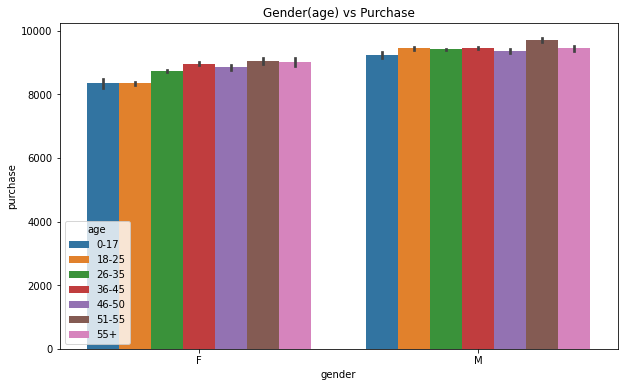

In [38]:
# gender vs purchase amount distribution

df = df.sort_values('age')
plt.figure(figsize = (10,6))

gen_vs_pa = sns.barplot(x = 'gender', y = 'purchase', hue = 'age', data = df)
plt.title('Gender(age) vs Purchase')

##### **Gender(age) vs Purchase**

Slightly more detailed information is provided compare to gender vs purchase graph.
Not too many useful information can be seen.
One noticeable pattern is that younger age people tend to spend less compare to older people.
In addition, people in 51-55 years old spend more money than other age range.


In [39]:
# nubmer of purchase per product

df_productpurchase = df.groupby('productid').size()
df_productpurchase = df_productpurchase.reset_index().sort_values(0, ascending = False)
df_productpurchase = df_productpurchase.rename(columns = {0 : 'purchasenum'})
df_productpurchase = df_productpurchase.head(10)
df_productpurchase

,productid,purchasenum
2536,P00265242,1880
249,P00025442,1615
1016,P00110742,1612
1030,P00112142,1562
565,P00057642,1470
1745,P00184942,1440
458,P00046742,1438
569,P00058042,1422
1355,P00145042,1406
582,P00059442,1406


Text(0.5, 1.0, 'Product_ID vs Purchase Number')

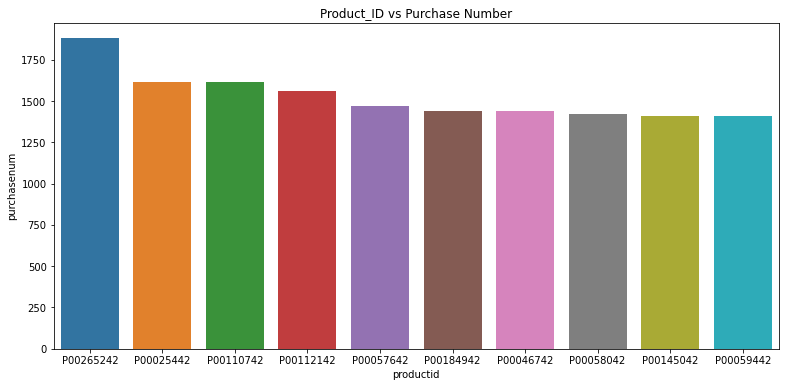

In [42]:
# top 10 nubmer of purchase per product data visualization
plt.figure(figsize = (13, 6))
sns.barplot(x = 'productid', y = 'purchasenum', data = df_productpurchase)

plt.title('Product_ID vs Purchase Number')

##### **Product category and id combination analysis**

First graph shows the top 10 most famous product categories in the tables.
Noticeably 1,5 and 8 had very large amount of orders.
Second graph shows the total sales for each category.
Even though the number of orders are very similar among 1, 5, and 8, category 1 has very significant amount of total sales compare to other categories.

### **Category Analysis**

Even though the category 1,5,8 have similar number of orders, total amount of order for category 1 is significantly larger than category 5 and 8.

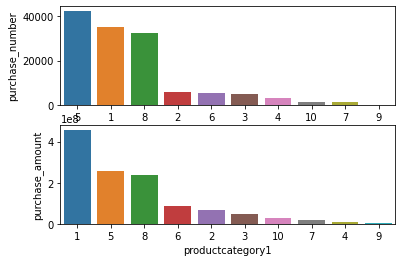

In [48]:
# City A analysis

df_city_a = df[df.citycategory == 'A']
df_city_a_pn = df_city_a.groupby('productcategory1').size()
df_city_a_pa = df_city_a.groupby('productcategory1').purchase.sum()

df_city_a_pn_top10 = df_city_a_pn.reset_index().rename(columns = {0: 'purchase_number'}).head(10)
df_city_a_pa_top10 = df_city_a_pa.reset_index().rename(columns = {'purchase' : 'purchase_amount'}).head(10)

fig, (ax1, ax2) = plt.subplots(2)

sns.barplot(ax = ax1, x= 'productcategory1', y = 'purchase_number', data = df_city_a_pn_top10,
           order = df_city_a_pn_top10.sort_values('purchase_number', ascending = False).productcategory1)


sns.barplot(ax = ax2, x= 'productcategory1', y = 'purchase_amount', data = df_city_a_pa_top10,
           order = df_city_a_pa_top10.sort_values('purchase_amount', ascending = False).productcategory1)


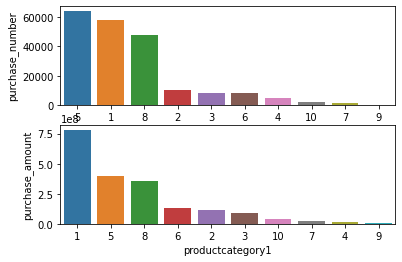

In [49]:
# City B analysis

df_city_b = df[df.citycategory == 'B']
df_city_b_pn = df_city_b.groupby('productcategory1').size()
df_city_b_pa = df_city_b.groupby('productcategory1').purchase.sum()

df_city_b_pn_top10 = df_city_b_pn.reset_index().rename(columns = {0: 'purchase_number'}).head(10)
df_city_b_pa_top10 = df_city_b_pa.reset_index().rename(columns = {'purchase' : 'purchase_amount'}).head(10)

fig, (ax1, ax2) = plt.subplots(2)

sns.barplot(ax = ax1, x= 'productcategory1', y = 'purchase_number', data = df_city_b_pn_top10,
           order = df_city_b_pn_top10.sort_values('purchase_number', ascending = False).productcategory1)

sns.barplot(ax = ax2, x= 'productcategory1', y = 'purchase_amount', data = df_city_b_pa_top10,
           order = df_city_b_pa_top10.sort_values('purchase_amount', ascending = False).productcategory1)

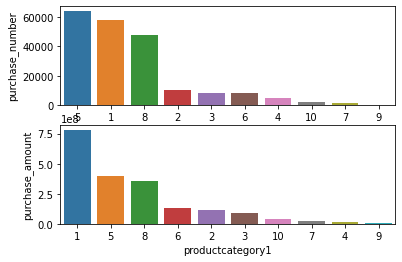

In [50]:
# City C analysis

df_city_c = df[df.citycategory == 'B']
df_city_c_pn = df_city_c.groupby('productcategory1').size()
df_city_c_pa = df_city_c.groupby('productcategory1').purchase.sum()

df_city_c_pn_top10 = df_city_c_pn.reset_index().rename(columns = {0: 'purchase_number'}).head(10)
df_city_c_pa_top10 = df_city_c_pa.reset_index().rename(columns = {'purchase' : 'purchase_amount'}).head(10)

fig, (ax1, ax2) = plt.subplots(2)

sns.barplot(ax = ax1, x= 'productcategory1', y = 'purchase_number', data = df_city_c_pn_top10,
           order = df_city_c_pn_top10.sort_values('purchase_number', ascending = False).productcategory1)

sns.barplot(ax = ax2, x= 'productcategory1', y = 'purchase_amount', data = df_city_c_pa_top10,
           order = df_city_c_pa_top10.sort_values('purchase_amount', ascending = False).productcategory1)

 ##### Analysis on each city
    
There are 6 graphs that compaes number of orders and total sales for each city.
All cities shows very similar trend which means category 1,5, and 8 for famous category and category 1 for most sales.